
## Twitter Sentiment Analysis
### Team: Allysa Nguyen & Prathiba R
Sentiment Analysis: Identifying sentiments in conversations is a challenging task for humans. Imagine how challenging it would be for machines? This is where you can put to use all that you have learned in the course, and also bring in your creativity in feature engineering/data processing/modeling hacks, etc to get a good enough model to help identify sentiments in tweets. In this project, the data set will have “targets” or “labels” that can have 3 options for each tweet - positive, negative or neutral sentiment. Even if a sentiment was predicted right for a tweet, the question is if the prediction of the model is also explainable to a lay-person. On the other hand, if the prediction was off - What factors contributed to the missing prediction and how can this be improved - This is also something you can work on as your improve your models. Most importantly, have fun through the project!

Code: Showcase all of your code - Including pre-processing of data, post-processing/evaluation metrics, and machine learning models you implemented in a Jupyter notebook. Also showcase plots that shows how you evaluated models for over-fitting (e.g. The comparison of Training/Validation loss curves).


Models: Implement at least 2 Machine learning models for your mini-project and try and optimize each of them. You can pick the best among them for your final Kaggle score evaluation. At least one ML model is a non-deep learning baseline and at least one is a deep learning model.


Insights: What insights did you gain by working on this data set? What are the pros/cons of each ML model? Describe your thought process as well in the choices you made as you set up the machine learning pipeline. Also mention how you took care of over-fitting if any.

ML Pipeline: Describe the components of the ML pipeline you set up for your project and any additional modules you added in to help optimize.


Evaluation Dimensions: Evaluate your machine learning models along the following dimensions: Performance (mention metrics and values you obtained), scalability (if you had to scale your model to a million training data points, which of the models would you pick, what bottlenecks would you face and rough idea on how you would scale), interpretability/explainability (which of the models are more interpretable/explainable to a lay person or your company CEO) and computational cost. You can even make a table to summarize your insights or have a section in your report on this.

Kaggle Starting Point for the competition: https://www.kaggle.com/c/twitter-sentiment-analysis-winter-2022/overview 

## Loading the data set

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# train and validation set
datapath = "./drive/MyDrive/twitter_sentiments_data.csv"
evalpath = "./drive/MyDrive/twitter_sentiments_evaluation.csv"

In [ ]:
dataset = pd.read_csv(datapath)
dataset.columns = ['sentiment', 'id', 'date', 'query', 'username', 'tweet']
dataset.head(3)

,sentiment,id,date,query,username,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Create dataframe with only tweets and sentiment value
df = dataset.drop(['id', 'date', 'query', 'username'], axis=1)
df.head(3)

,sentiment,tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'Sentiment Data Distribution')

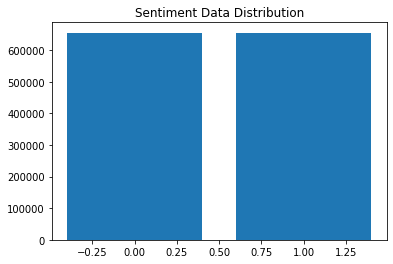

In [ ]:
# View distribution of negative and positve sentiments
val_count = df.sentiment.value_counts()

plt.figure()
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
df.tweet

0          is upset that he can't update his Facebook by ...
1          @Kenichan I dived many times for the ball. Man...
2          @nationwideclass no, it's not behaving at all....
3                              @Kwesidei not the whole crew 
4                                                Need a hug 
                                 ...                        
1310101    Just woke up. Having no school is the best fee...
1310102    TheWDB.com - Very cool to hear old Walt interv...
1310103    Are you ready for your MoJo Makeover? Ask me f...
1310104    Happy 38th Birthday to my boo of alll time!!! ...
1310105    happy #charitytuesday @theNSPCC @SparksCharity...
Name: tweet, Length: 1310106, dtype: object

In [ ]:
import string
s = "he##@@llo!!!!"
punc = string.punctuation
punc = punc.replace('@', '')
punc = punc.replace('#', '')
# s.translate(str.maketrans('', '', punc))
# s = ''.join(ch for ch in s if ch not in punc)
# s

In [ ]:
# Remove stop words and stemming/lematization of tweets
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
#   text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  words = []
  for word in text.lower().split():
    word = ''.join(ch for ch in word if ch not in punc)
    if word not in stop_words and word.isalnum() and "http" not in word:
      if stem:
        words.append(stemmer.stem(word))
      else:
        words.append(word)
  return " ".join(words)



In [ ]:
preprocess("@Kenichan I hekllo dived many times for the ball ball. Man")

'hekllo dived many times ball ball man'

In [ ]:
df.tweet = df.tweet.apply(lambda x: preprocess(x))
df.tweet

0          upset cant update facebook texting might cry r...
1          dived many times ball managed save 50 rest go ...
2                                   behaving im mad cant see
3                                                 whole crew
4                                                   need hug
                                 ...                        
1310101                        woke school best feeling ever
1310102              thewdbcom cool hear old walt interviews
1310103                      ready mojo makeover ask details
1310104    happy 38th birthday boo alll time tupac amaru ...
1310105                                                happy
Name: tweet, Length: 1310106, dtype: object

In [ ]:
# Preform TF-IDF 
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectors = vectorizer.fit_transform(df.tweet)
print(vectors.shape)
# save vocab to run on eval set
vocab = vectorizer.vocabulary_.keys()
vocab = vectorizer.get_feature_names_out() 
vocab

(1310106, 500000)


array(['00', '000', '000 followers', ..., 'øœ', 'ùùš', 'ùˆ'], dtype=object)

In [ ]:
# Split train/test data
X_train, X_test, y_train, y_test = train_test_split(vectors, df.sentiment, test_size=0.2,
                                         random_state=77) # Splits Dataset into Training and Testing set
print("Train Data size:", X_train.shape)
print("Test Data size", y_train.shape)

Train Data size: (1048084, 500000)
Test Data size (1048084,)


In [ ]:
# Split train/test data - clean 
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(df.tweet, df.sentiment, test_size=0.2,
                                         random_state=77) # Splits Dataset into Training and Testing set
print("Train Data size:", X_train_clean.shape)
print("Test Data size", y_train_clean.shape)

Train Data size: (1048084,)
Test Data size (1048084,)


##Classification models

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

def print_results(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test,y_pred))
    print("F1 Score:", f1_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))

In [ ]:
logregression = LogisticRegression(solver='saga', penalty='l2', max_iter=300, C=3.0)
logregression.fit(X_train, y_train)
log_pred = logregression.predict(X_test)
print_results(y_test,log_pred)

Accuracy: 0.7972841975101327
F1 Score: 0.8004553207155898
[[102371  28808]
 [ 24308 106535]]


In [ ]:
BNBmodel = BernoulliNB(alpha = 1.1)
BNBmodel.fit(X_train, y_train)
bnb_pred = BNBmodel.predict(X_test)
print_results(y_test,bnb_pred)

Accuracy: 0.7829800551098762
F1 Score: 0.7888169231683404
[[ 98958  32221]
 [ 24643 106200]]


In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier() 
sgdc.fit(X_train, y_train)
sgdc_pred = sgdc.predict(X_test)
print_results(y_test,sgdc_pred)

Accuracy: 0.7644434436803017
F1 Score: 0.7756211942197582
[[ 93624  37555]
 [ 24166 106677]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
randForest = SGDClassifier() 
randForest.fit(X_train, y_train)
randForest_pred = randForest.predict(X_test)
print_results(y_test,randForest_pred)

Accuracy: 0.7641839234873408
F1 Score: 0.7756838685084679
[[ 93400  37779]
 [ 24010 106833]]


## Run Model on evaluation dataset

In [ ]:
evalset = pd.read_csv(evalpath)
evalset.head(3)

,tweet_index,time stamp,Unnamed: 2,user,tweet
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
2,1986106482,Sun May 31 18:20:01 PDT 2009,NO_QUERY,taraw07,Doesnt want to leave i should just move here...


In [ ]:
evalset.tweet = evalset.tweet.apply(lambda x: preprocess(x))
evalset.tweet

0         awww thats bummer shoulda got david carr third...
1                          whole body feels itchy like fire
2                                    doesnt want leave move
3                               may sáº½ bãªn em mã cã³ anh
4         hey long time see yes rains bit bit lol im fin...
                                ...                        
289829    soooo almost 70 followers part ignoring wanna ...
289830     phone gets relentless thrown thanks buggered lol
289831                         give people like song played
289832            donna thank wonderful mention awesome day
289833                                        yay sun today
Name: tweet, Length: 289834, dtype: object

In [ ]:
vectorizer = TfidfVectorizer(vocabulary=vocab)
eval_vectors = vectorizer.fit_transform(evalset.tweet)
print(eval_vectors.shape)

(289834, 500000)


In [ ]:
# Run predictions on eval dataset
log_eval = logregression.predict(eval_vectors)
# Create dataframe
outdf = pd.DataFrame()
outdf["tweet_index"] = evalset.tweet_index
outdf["target"] = log_eval
outdf.set_index('tweet_index', inplace=True)
outdf.to_csv("out.csv")

outdf

,target
tweet_index,
1467810369,0
1467811184,0
1986106482,0
2324660036,1
1467811594,1
...,...
1964021414,0
2014990392,0
2014990424,1


In [ ]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

en_stopwords = set(stopwords.words("english")) 

def tokenize(text): 
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

In [ ]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    ngram_range=(1, 1),
    stop_words = en_stopwords
    max_features=500000)



kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

np.random.seed(1)

pipeline_svm = make_pipeline(vectorizer, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(X_train_clean, y_train_clean)
grid_svm.score(X_test_clean, y_test_clean)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(df.tweet)
test_vectors = vectorizer.transform(evalset.tweet)

kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, df.sentiment)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(df.sentiment, prediction_linear, output_dict=True)
print('positive: ', report['pos'])
print('negative: ', report['neg'])